75:25
70:30

# Regression

# Linear Regression

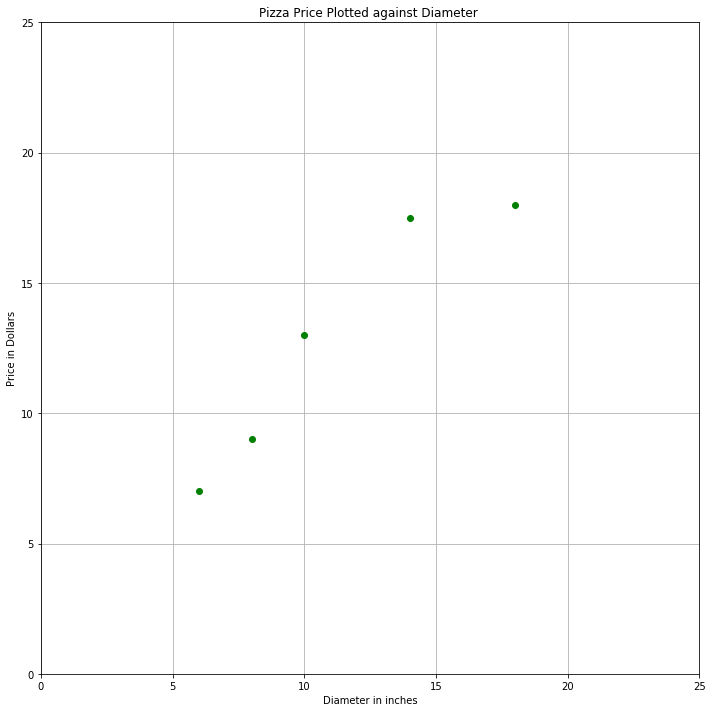

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

PSize = [[6],[8],[10],[14],[18]]
PPrice = [[7],[9],[13],[17.5],[18]]

plt.figure(figsize=[10,10])
plt.title("Pizza Price Plotted against Diameter ")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in Dollars")
plt.plot(PSize,PPrice,'go')
#plt.plot(PPrice,PSize,'go')
plt.axis([0,25,0,25])
plt.grid(True)

plt.tight_layout()

[[10], [14], [18], [8]]
[[6]]
[[13], [17.5], [18], [9]]
[[7]]


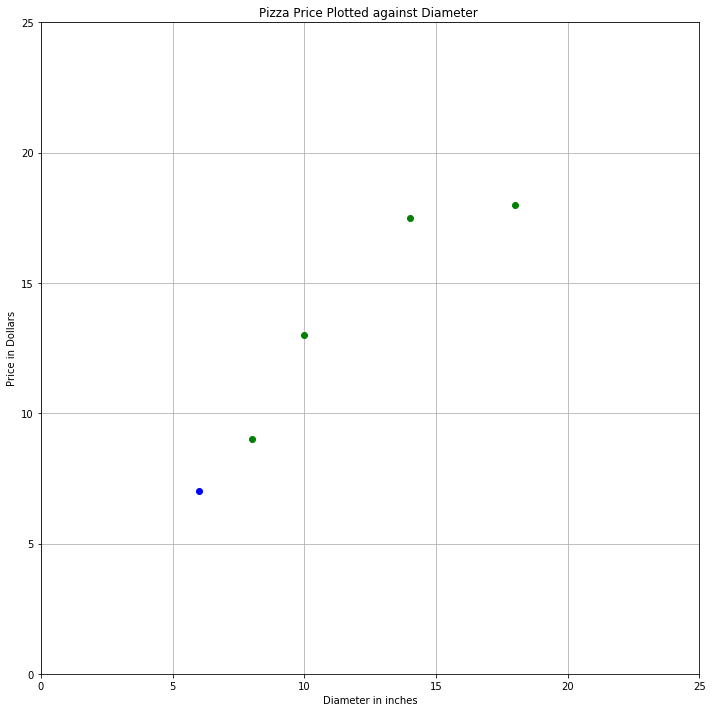

In [2]:
#pip install sklearn
from sklearn.model_selection import train_test_split

PSize_train,PSize_test,PPrice_train,PPrice_test=train_test_split(PSize,PPrice,test_size=0.2)
#other arguments - random_state=none,shuffle=True
print(PSize_train)
print(PSize_test)
print(PPrice_train)
print(PPrice_test)

plt.figure(figsize=[10,10])
plt.title("Pizza Price Plotted against Diameter ")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in Dollars")
plt.plot(PSize_train,PPrice_train,'go')
plt.plot(PSize_test,PPrice_test,'bo')
plt.axis([0,25,0,25])
plt.grid(True)

plt.tight_layout()

In [3]:
from sklearn.linear_model import LinearRegression

#create and fit the model

model = LinearRegression()
model.fit(PSize_train, PPrice_train)


print(PPrice_test)#actual output
print(model.predict(PSize_test))#predicted output

[[7]]
[[8.61864407]]


In [4]:
print(model.predict([[0]]))
print(model.predict([[25]]))
print(model.predict([[0],[10],[20]]))

[[3.30508475]]
[[25.44491525]]
[[ 3.30508475]
 [12.16101695]
 [21.01694915]]


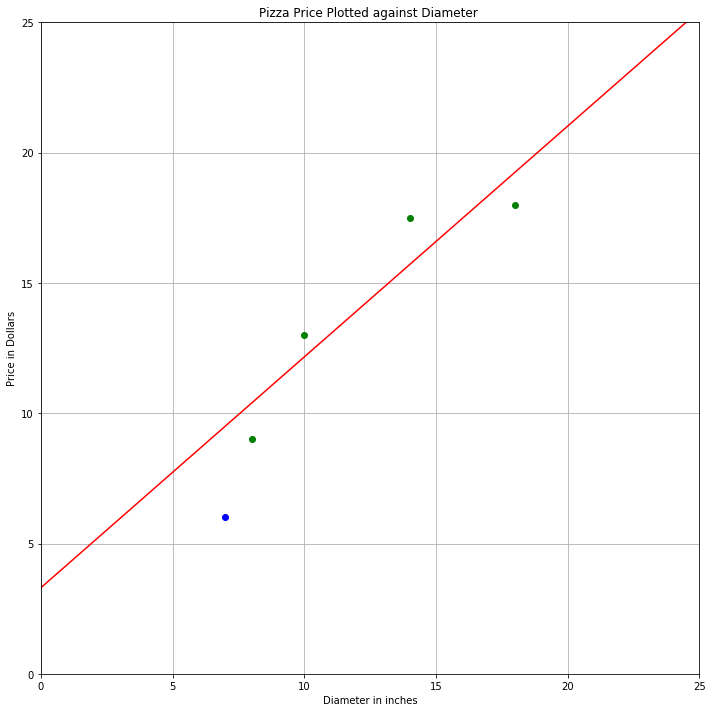

In [5]:
plt.figure(figsize=[10,10])
plt.title("Pizza Price Plotted against Diameter ")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in Dollars")
plt.plot(PSize_train,PPrice_train,'go')
plt.plot(PPrice_test,PSize_test,'bo')
plt.axis([0,25,0,25])
plt.grid(True)

plt.tight_layout()

#plot regression solution line

plt.plot([0,25],[model.predict([[0]])[0][0],model.predict([[25]])[0][0]], color= 'r')

In [6]:
print("Slope(m) is %.2f and Intercept is%.2f" 
      %(model.coef_, model.intercept_)) 

Slope(m) is 0.89 and Intercept is3.31


In [7]:
print(model.score(PSize,PPrice))   #R2 coefficient

0.8967565549845546


In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(PPrice, model.predict(PSize), multioutput = 'uniform_average')
# multioutput defines weight used to average error
print("MSE IS",mse )

MSE IS 2.0070525711002585


# Stochastic Gradient Descent

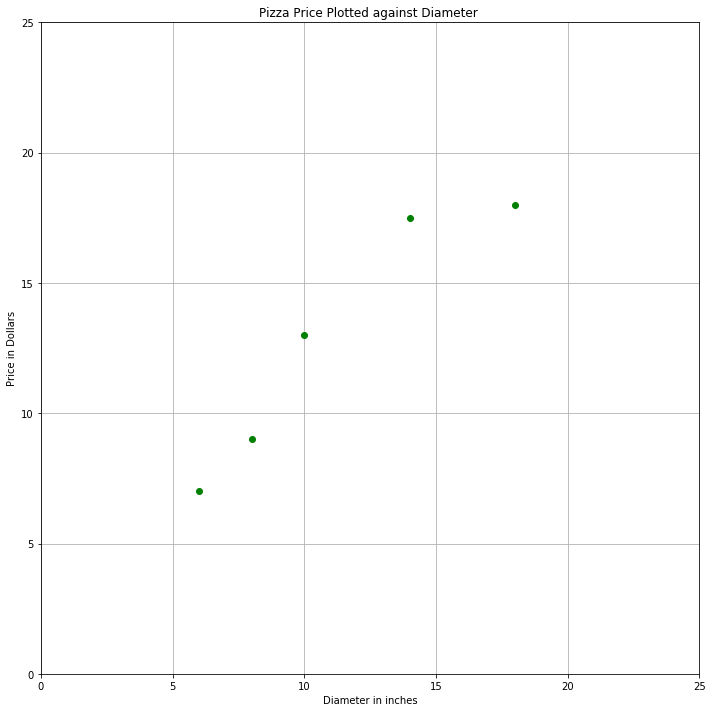

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

PSize = [6,8,10,14,18]
X = np.array(PSize).reshape(-1,1) 
PPrice = [7,9,13,17.5,18]
Y = np.array(PPrice) 

plt.figure(figsize=[10,10])
plt.title("Pizza Price Plotted against Diameter ")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in Dollars")
plt.plot(X,Y,'go')
#plt.plot(PPrice,PSize,'go')
plt.axis([0,25,0,25])
plt.grid(True)

plt.tight_layout()

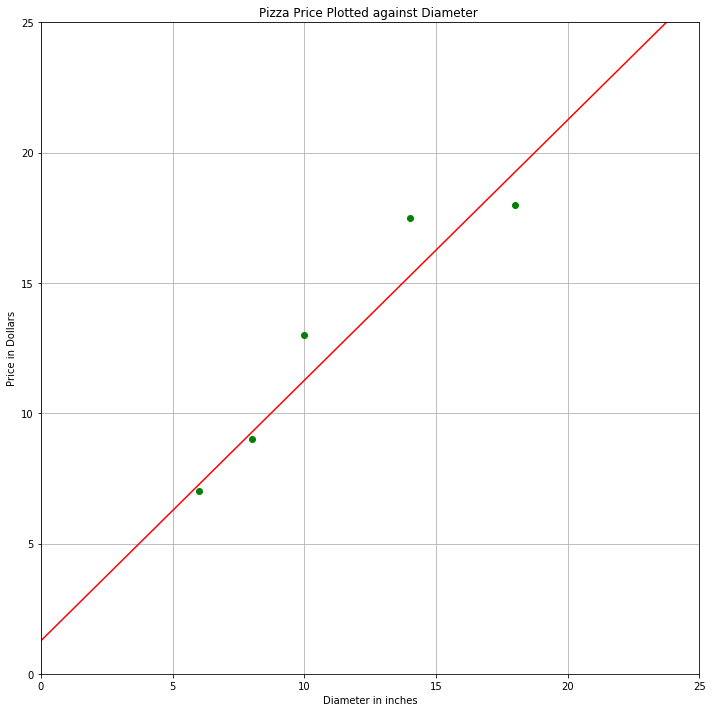

In [10]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss='squared_loss',max_iter=2000)
#other_arguments-penalty=alpha,shuffle=True,max_iter=1000tol=0.001

model.fit(X,Y)

plt.figure(figsize=[10,10])
plt.title("Pizza Price Plotted against Diameter ")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in Dollars")
plt.plot(X,Y,'go')
#plt.plot(PSize_test,PPrice_test,'bo')
plt.axis([0,25,0,25])
plt.grid(True)
plt.tight_layout()

plt.plot([0,25],[model.predict([[0]]),model.predict([[25]])],color='r')


In [11]:
print(model.n_iter_)

564


In [12]:
print(model.score(X,Y))   #r2 coefficient

0.8995472646005229


In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, model.predict(X), multioutput = 'uniform_average')
# multioutput defines weight used to average error
print(" SGD MSE IS",mse )

 SGD MSE IS 1.9528011761658344


# Polynomial Regression

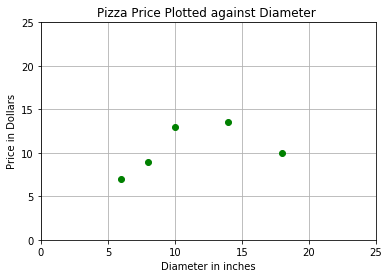

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

PSize = [[6],[8],[10],[14],[18]]
PPrice = [[7],[9],[13],[13.5],[10]]

plt.figure()
plt.title("Pizza Price Plotted against Diameter ")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in Dollars")
plt.plot(PSize,PPrice,'go')
#plt.plot(PPrice,PSize,'go')
plt.axis([0,25,0,25])
plt.grid(True)

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
#degree=2,interaction _only,false,include,include_bias=True,order='c'

QuadraticCoeff = poly.fit_transform(PSize)
print(QuadraticCoeff[0:3])

[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]]


In [16]:
#create and fit the model
model = LinearRegression()
model.fit(QuadraticCoeff,PPrice)

print(PPrice)
print(model.predict(QuadraticCoeff))

[[7], [9], [13], [13.5], [10]]
[[ 6.56982942]
 [10.03624733]
 [12.34754797]
 [13.50479744]
 [10.04157783]]


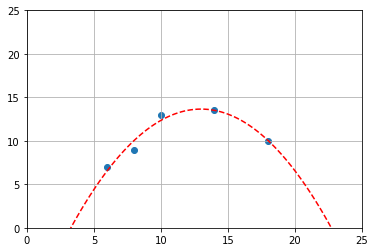

In [17]:
#plotting the curve
xx=np.linspace(0,25,101).reshape(-1,1)
#print(xx)`
xx_quadratic = poly.fit_transform(xx)

plt.axis([0,25,0,25])
plt.grid()
plt.plot(xx,model.predict(xx_quadratic),c='r',linestyle='--')
plt.scatter(PSize,PPrice)
plt.show()